In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
import pandas as pd
import numpy as np

## Load data   

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
display(train_df.head())
display(test_df)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [3]:
print("Columns in train:", len(train_df.columns))
print("Columns in test:", len(test_df.columns))
print("Prediction Column", set(train_df.columns)-set(test_df.columns))
features = train_df.columns.values[2:102]

Columns in train: 202
Columns in test: 201
Prediction Column {'target'}


# Identifying the number of NaNs in the data

In [4]:
train_df.isna().sum(), test_df.isna().sum()

(ID_code    0
 target     0
 var_0      0
 var_1      0
 var_2      0
           ..
 var_195    0
 var_196    0
 var_197    0
 var_198    0
 var_199    0
 Length: 202, dtype: int64,
 ID_code    0
 var_0      0
 var_1      0
 var_2      0
 var_3      0
           ..
 var_195    0
 var_196    0
 var_197    0
 var_198    0
 var_199    0
 Length: 201, dtype: int64)

# Numeric Value Description of Data

In [5]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


# Learnings from above
#### 1. High Standard Deviation means data is highly distribubted
#### 2. Mean across variables is distributed hence when doing classification we will be required to rescale the data

# Identifying Class Distribution

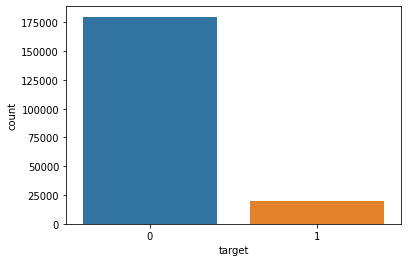

In [7]:
sns.countplot(train_df['target'])

In [8]:
print("Values with one: ",(100 * train_df["target"].value_counts()[1]/train_df.shape[0]))
print("Values with zeros: ",(100 * train_df["target"].value_counts()[0]/train_df.shape[0]))

Values with one:  10.049
Values with zeros:  89.951


# Learning:
### The data is unbalanced with respect to **target** value.   

In [9]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

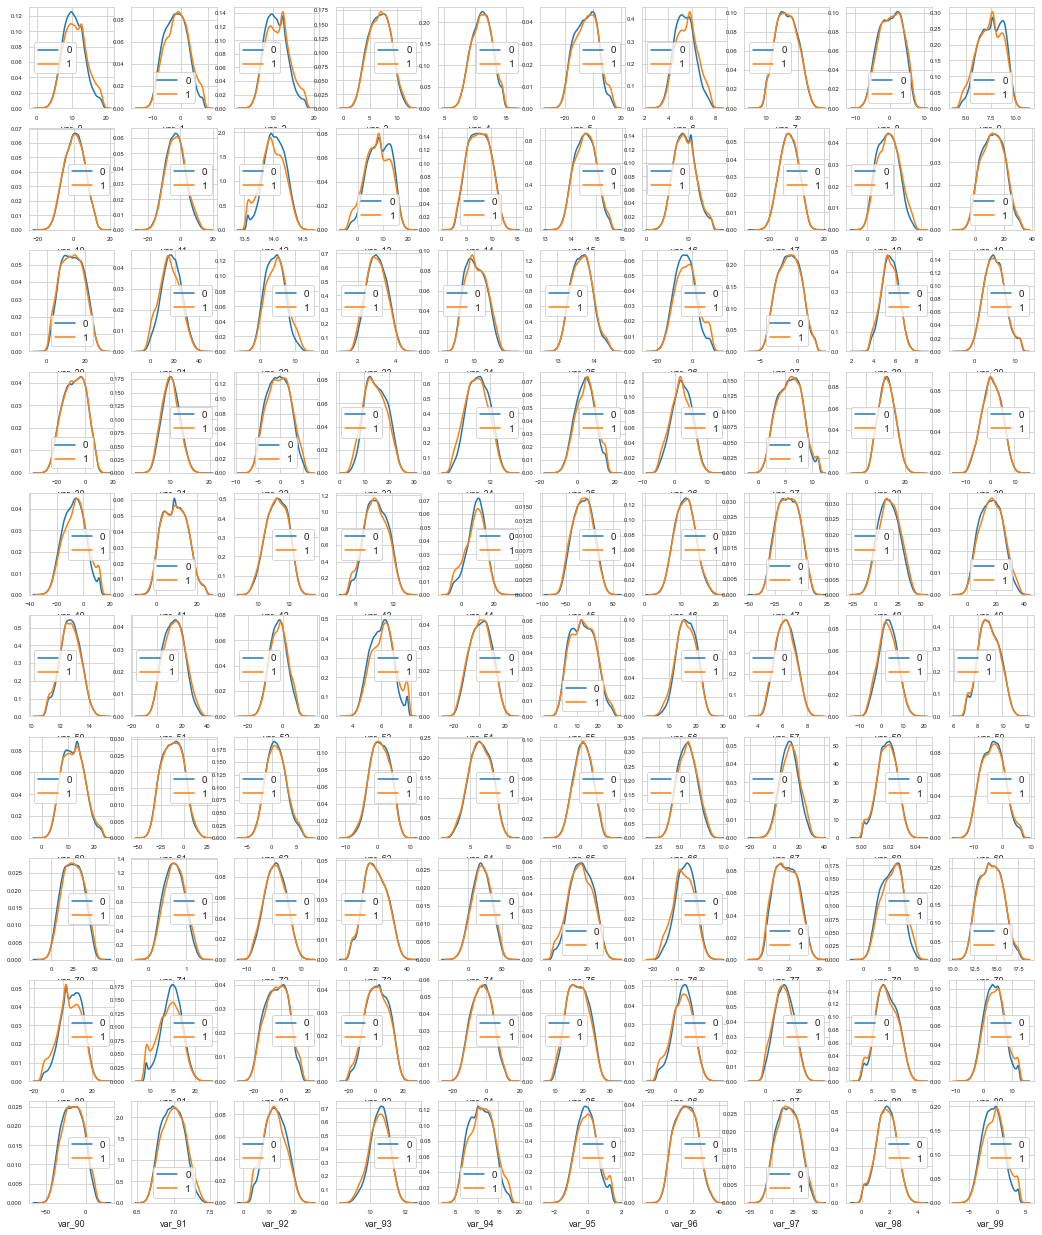

In [10]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plot_feature_distribution(t0, t1, '0', '1', features)

# Learning
#### By comparing the distribution of variables in the two classes we can identify which features have different distribution hence they would help in classifying (more important feature ) 

<Figure size 432x288 with 0 Axes>

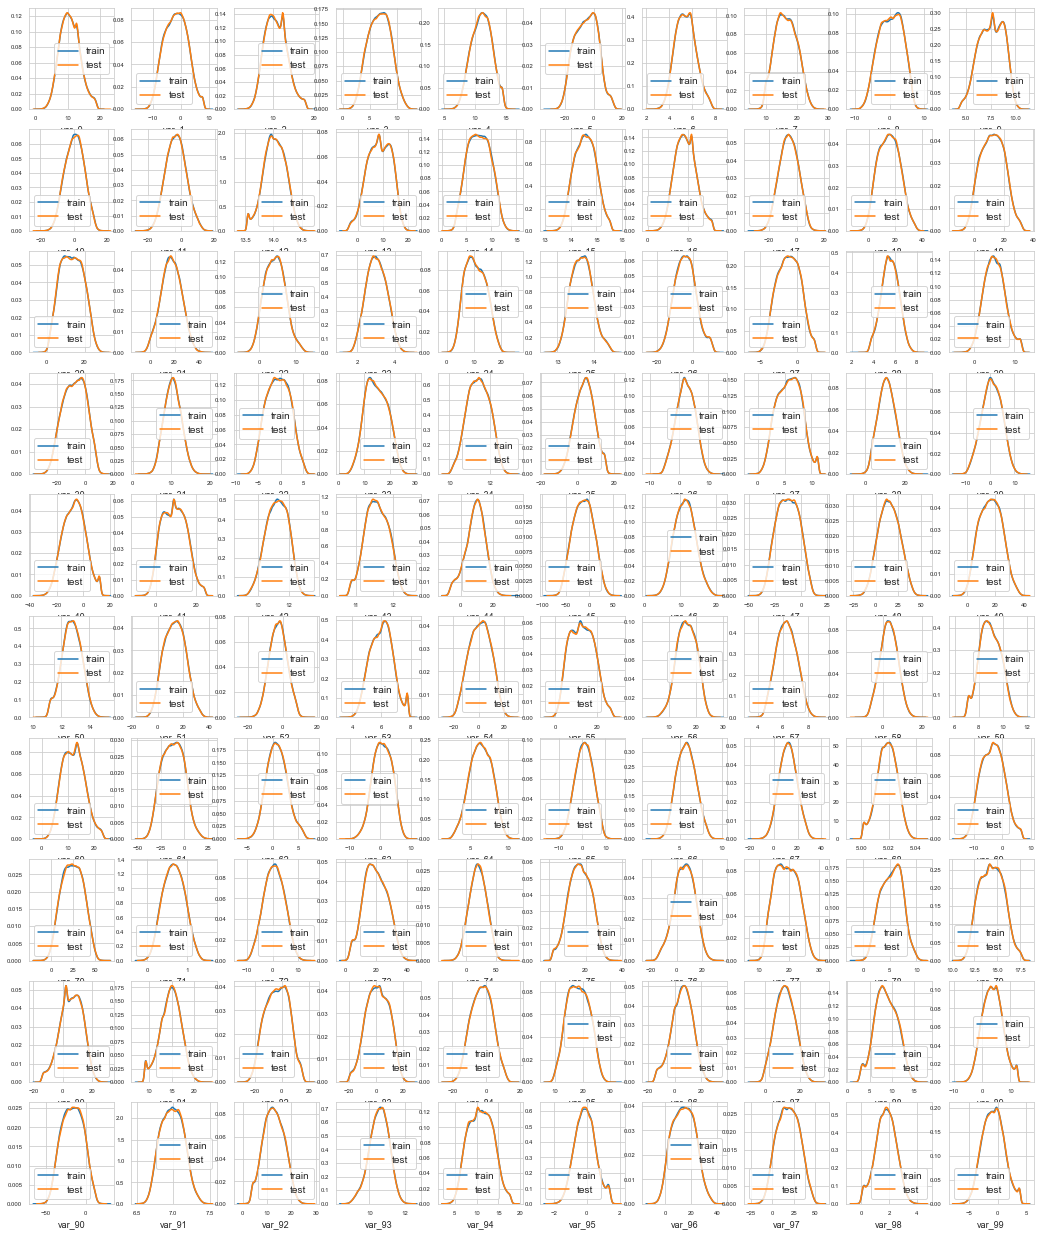

In [11]:
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

# Learning
#### By comparing the distribution of variabels in test and train we can identify if features distribution is similar or not. If yes then we can say that the data in test and train are from same population and hence a model trained on training data will be generalised. 

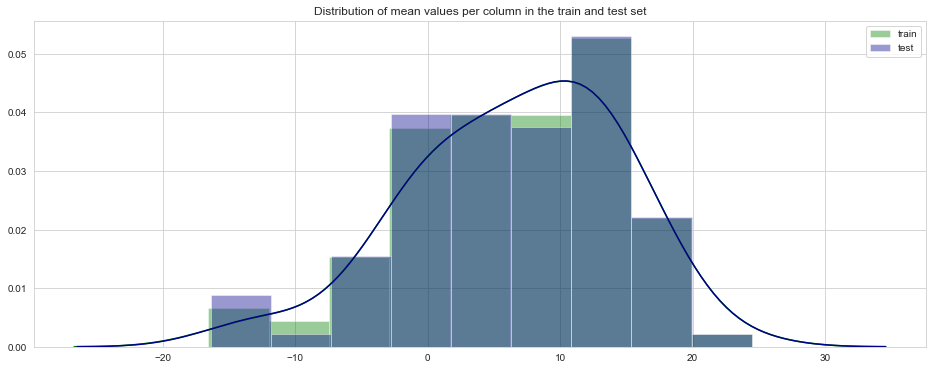

In [12]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="green", label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", label='test')
plt.legend()
plt.show()

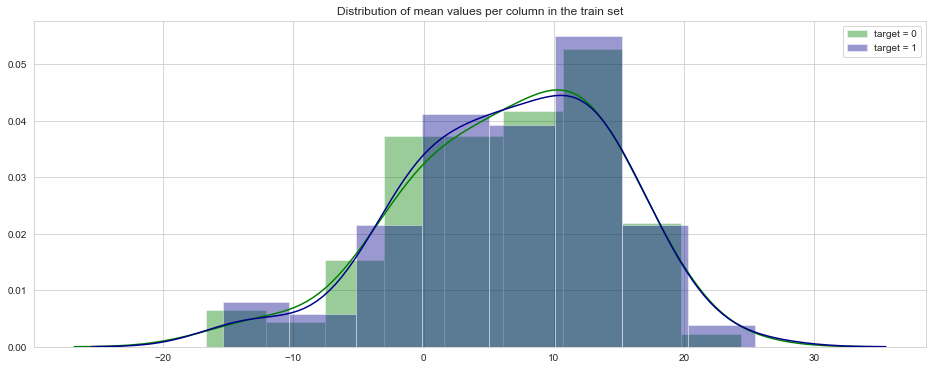

In [13]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green",label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue",label='target = 1')
plt.legend(); plt.show()

# Learning
#### The distribution of test vs train is pretty similar which again shows that the train and test data are very similar hence we can say they are from similar population and the model will be generalised

# Learning
#### The distribbution of Label 1 and Labbel 2 are considerably different which mean there are factors( features ) that can help us distinguish them 

## Feature Correlation

In [14]:
correlations = train_df[features].corr().abs().reset_index()
correlations.head(10)

,index,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99
0,var_0,1.000000,0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.005071,0.000278,0.001133,0.000220,0.001620,0.000036,0.003087,0.002611,0.000541,0.003813
1,var_1,0.000544,1.000000,0.003980,0.000010,0.000303,0.000902,0.003258,0.001511,0.004098,...,0.001329,0.001665,0.000211,0.005821,0.003288,0.002303,0.001102,0.001385,0.001352,0.004871
2,var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,0.000991,0.002648,...,0.002074,0.003774,0.001892,0.005182,0.002197,0.001884,0.003578,0.001954,0.001803,0.005606
3,var_3,0.003801,0.000010,0.001001,1.000000,0.000322,0.003253,0.000774,0.002500,0.003553,...,0.000733,0.004404,0.000432,0.001282,0.001318,0.001794,0.000179,0.001787,0.000259,0.001393
4,var_4,0.001326,0.000303,0.000723,0.000322,1.000000,0.001368,0.000049,0.004549,0.001194,...,0.001619,0.000888,0.000751,0.002142,0.001271,0.000841,0.003195,0.000050,0.002241,0.000230
5,var_5,0.003046,0.000902,0.001569,0.003253,0.001368,1.000000,0.002588,0.000995,0.000147,...,0.001590,0.004073,0.002699,0.000906,0.003653,0.001016,0.000776,0.002501,0.002829,0.002644
6,var_6,0.006983,0.003258,0.000883,0.000774,0.000049,0.002588,1.000000,0.002548,0.001188,...,0.005135,0.003198,0.004714,0.002072,0.002141,0.001382,0.000089,0.003652,0.002818,0.004929
7,var_7,0.002429,0.001511,0.000991,0.002500,0.004549,0.000995,0.002548,1.000000,0.000814,...,0.002081,0.001173,0.000688,0.001212,0.000173,0.000284,0.000298,0.000675,0.004167,0.000688
8,var_8,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,0.001188,0.000814,1.000000,...,0.001635,0.000171,0.004717,0.000570,0.002077,0.001006,0.000421,0.002381,0.002110,0.000930
9,var_9,0.002613,0.000832,0.001932,0.000826,0.000918,0.005279,0.005697,0.002885,0.001073,...,0.003196,0.003597,0.002484,0.000266,0.007182,0.001818,0.002657,0.000371,0.005864,0.003458


# By substituting 1 with 0 we remove all self correlation == 1 
# We then describe the correlation dataframe which will tell the max correlation for every column ( where every column is a feature)

In [15]:
correlations.replace(1,0).describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.002217,0.002345,0.002598,0.001628,0.001564,0.002078,0.002554,0.001584,0.001700,0.002166,...,0.002095,0.002161,0.002157,0.002163,0.002050,0.002400,0.001820,0.001776,0.001703,0.002408
std,0.001775,0.001727,0.001937,0.001222,0.001153,0.001526,0.001752,0.001249,0.001289,0.001720,...,0.001612,0.001362,0.001803,0.001640,0.001420,0.001678,0.001270,0.001337,0.001437,0.001855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000825,0.000899,0.000986,0.000527,0.000772,0.000800,0.001264,0.000599,0.000722,0.000766,...,0.000821,0.001164,0.000553,0.000831,0.000893,0.001014,0.000775,0.000681,0.000657,0.000907
50%,0.001634,0.002047,0.002140,0.001397,0.001277,0.001934,0.002479,0.001187,0.001371,0.001784,...,0.001731,0.001953,0.001793,0.001638,0.001880,0.002126,0.001584,0.001475,0.001155,0.002094
75%,0.003348,0.003534,0.003782,0.002414,0.002306,0.003127,0.003415,0.002429,0.002566,0.003204,...,0.002990,0.003017,0.003388,0.003180,0.002978,0.003451,0.002728,0.002810,0.002550,0.003587
max,0.007175,0.008855,0.008795,0.005717,0.004549,0.005736,0.008958,0.005396,0.004962,0.007182,...,0.006412,0.006182,0.006442,0.007796,0.007182,0.007021,0.005283,0.004967,0.006125,0.007828


# Absolute Duplicates in datasets

In [16]:
print(train_df[features].shape, train_df[features].drop_duplicates().shape)
print(test_df[features].shape, test_df[features].drop_duplicates().shape)

# No absolute duplicates in train or test

(200000, 100) (200000, 100)
(200000, 100) (200000, 100)


# Feature vise duplicates

In [17]:
for feature in features:
    print("Duplicates in ",feature,"->",train_df[feature].shape[0] - train_df[feature].drop_duplicates().shape[0])

Duplicates in  var_0 -> 105328
Duplicates in  var_1 -> 91068
Duplicates in  var_2 -> 113445
Duplicates in  var_3 -> 125403
Duplicates in  var_4 -> 136485
Duplicates in  var_5 -> 58971
Duplicates in  var_6 -> 161401
Duplicates in  var_7 -> 96937
Duplicates in  var_8 -> 101383
Duplicates in  var_9 -> 150583
Duplicates in  var_10 -> 71236
Duplicates in  var_11 -> 69807
Duplicates in  var_12 -> 190439
Duplicates in  var_13 -> 84819
Duplicates in  var_14 -> 120878
Duplicates in  var_15 -> 180190
Duplicates in  var_16 -> 113082
Duplicates in  var_17 -> 62177
Duplicates in  var_18 -> 60485
Duplicates in  var_19 -> 55820
Duplicates in  var_20 -> 72236
Duplicates in  var_21 -> 59938
Duplicates in  var_22 -> 109340
Duplicates in  var_23 -> 175087
Duplicates in  var_24 -> 94899
Duplicates in  var_25 -> 185147
Duplicates in  var_26 -> 72911
Duplicates in  var_27 -> 139815
Duplicates in  var_28 -> 164141
Duplicates in  var_29 -> 111661
Duplicates in  var_30 -> 54023
Duplicates in  var_31 -> 122612


# Feature Engineering

In [18]:
for df in [test_df, train_df]:
    df['mean'] = df[features].mean(axis=1)
    df['std'] = df[features].std(axis=1)

In [19]:
train_df[train_df.columns[202:]].head()

,mean,std
0,7.192290,9.393247
1,6.470577,10.936666
2,6.481285,8.572490
3,5.816680,9.407683
4,5.707823,12.671080


In [20]:
test_df[test_df.columns[201:]].head()

,mean,std
0,7.658533,9.909698
1,6.100030,9.996668
2,6.632278,9.832635
3,7.126159,8.944342
4,7.653522,9.598908


In [21]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

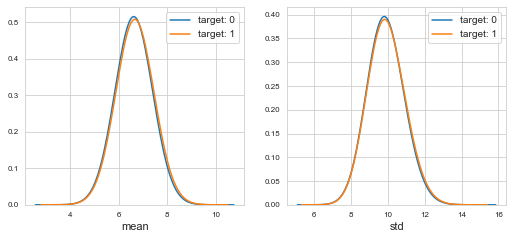

In [22]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

Let's show the distribution of new features values for train and test.

<Figure size 432x288 with 0 Axes>

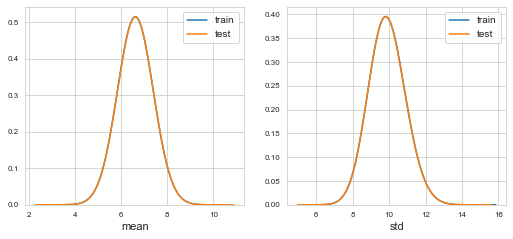

In [23]:
features = train_df.columns.values[202:]
plot_new_feature_distribution(train_df, test_df, 'train', 'test', features)

# Classification

In [24]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']

### Considering the number of features it is advisable to reduce the features to remove redundent features and reduce the moment of freedom

In [28]:
pca = PCA(150)
X_pca = pca.fit_transform(train_df[features])

# Explained variance per PC

# Variaation explained in by every 150 components taken
pca_evr = pca.explained_variance_ratio_

# Cumulative varience explaind
cumsum_ = np.cumsum(pca_evr)

# the index till which we can explain more than 0.95 varience
np.argmax(cumsum_ >= 0.95) + 1

111

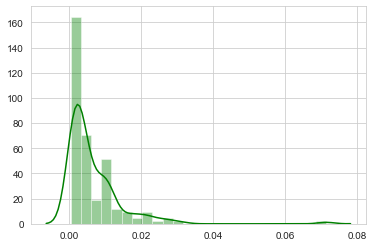

In [29]:
sns.distplot(pca_evr,color="green", label='train')

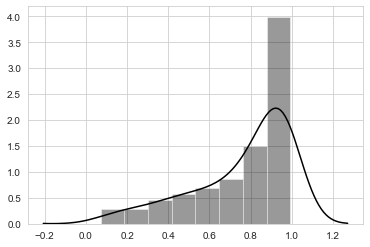

In [30]:
sns.distplot(list(cumsum_),color="black", label='train')

### By the 111 component of the PCA we are able to explain 0.95 varience

#### So by reducing the features from 202 -> 111 we have reduced the Model's varience because of reduction in degree of freedom

In [31]:
from sklearn.metrics import precision_recall_fscore_support, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
import itertools

In [32]:
X = train_df[features]
Y = train_df["target"]
X_pca = PCA(111).fit_transform(train_df[features])
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.30, random_state=42)

## Scaling 
#### 1. a scaler is trained on the training data. The training data is scaled between 0,1.
#### 2. similar mean and std used for the training is also used for testing so that the scaling factor remains same throught the process

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_scalaed = scaler.transform(X_train)
X_test_scalaed = scaler.transform(X_test)

## Decision Tree

,0,1
precision,0.900253,0.186361
recall,0.906531,0.175694
f1 score,0.903381,0.180870


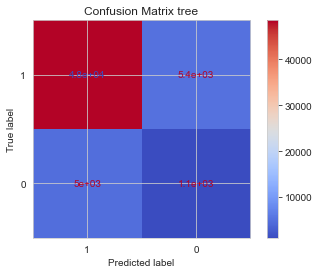

In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scalaed, y_train)

disp = plot_confusion_matrix(tree, X_test_scalaed, y_test,
                             display_labels=[1,0],
                             cmap=plt.cm.coolwarm, normalize=None)
disp.ax_.set_title("Confusion Matrix tree")

result_df = pd.DataFrame(precision_recall_fscore_support(tree.predict(X_test_scalaed),y_test))[:-1]
result_df.index = ["precision","recall","f1 score"]
result_df

# Support Vector Machine (linear)

,0,1
precision,0.999666,0.009603
recall,0.898453,0.766234
f1 score,0.946361,0.018968


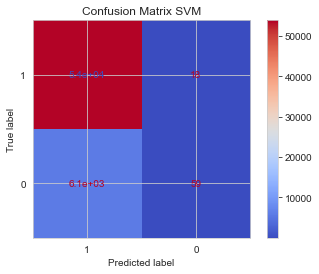

In [35]:
svm = LinearSVC()
svm.fit(X_train_scalaed, y_train)
svm.score(X_test_scalaed, y_test)

disp = plot_confusion_matrix(svm, X_test_scalaed, y_test,
                             display_labels=[1,0],
                             cmap=plt.cm.coolwarm, normalize=None)
disp.ax_.set_title("Confusion Matrix SVM")

result_df = pd.DataFrame(precision_recall_fscore_support(svm.predict(X_test_scalaed),y_test))[:-1]
result_df.index = ["precision","recall","f1 score"]
result_df

# Probabilistic naive_bayes

,0,1
precision,0.994337,0.119466
recall,0.908244,0.706449
f1 score,0.949343,0.204371


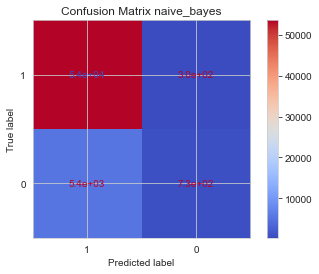

In [36]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scalaed, y_train)
disp = plot_confusion_matrix(naive_bayes, X_test_scalaed, y_test,
                             display_labels=[1,0],
                             cmap=plt.cm.coolwarm, normalize=None)
disp.ax_.set_title("Confusion Matrix naive_bayes")

result_df = pd.DataFrame(precision_recall_fscore_support(naive_bayes.predict(X_test_scalaed),y_test))[:-1]
result_df.index = ["precision","recall","f1 score"]
result_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


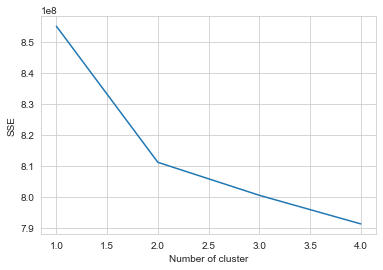

In [37]:
sse = {}
for k in tqdm_notebook(range(1, 5)):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    #X_train["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [40]:
# In the above using unsupervised clustering we can see the SSE sum of the squared error comes down considerabbly when cluster changes from 1->?2
# After 2 there is no abrubt change of slope hence we consider 2 as total number of cluster (which is the actual number of classes)

In [41]:
# Using number of cluster as 2
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(X_train)
result_df = pd.DataFrame(precision_recall_fscore_support(kmeans.predict(X_test_scalaed),y_test))[:-1]
result_df.index = ["precision","recall","f1 score"]
result_df

,0,1
precision,0.999332,0.000651
recall,0.897598,0.100000
f1 score,0.945737,0.001294


# Best performance naive bayes as it has miniumum biasness towards one class seen from F1 score